In [ ]:
 #PARTE 1.1: FUNÇÕES PARA LER OS DADOS ORIGINAIS.

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


def loading_image(name_image: str, result=False):
    """
    :param name_image: diretório + nome do arquivo em que está a imagem.
    :param result: verdadeiro para uma label(3d) e falso para uma feature(4d).
    :return: numpy array com uma matriz representando uma 2d da média das diversas imagens.

    Carrega uma imagem do tipo nii.gz com a biblioteca nibabel (função load). A partir do que é gerado pela função load,
    transforma-se o objeto em um array numpy. Esse vetor numpy é reduzido, utilizando a função to_d2.

    As imagens de resultados (labels) possuem o shape diferente, então são lidos de forma diferente, por isso a existência da parâmetro result.
    """

    img_nib = nib.load(name_image)
    image3d = np.array(img_nib.dataobj)
    
    if result:
        image2d = reduction_of_image(to_d2(image3d, result=True))
    else:
        image2d = reduction_of_image(to_d2(image3d))

    return image2d


def to_d2(loaded_image, result=False):
    """
    :param loaded_image: objeto numpy de alguma imagem lido com a biblitoeca numpy
    :param result: verdadeiro para uma label(4d) e falso para uma feature(3d).
    :return: um array numpy de duas dimensões.

    separa um dos grupos da imagem (quarta dimensão referente ao tipo de contrates utilizado) e faz a média entre eles.
    """
    if result:
        return np.mean(loaded_image, axis=2)

    loaded_image = np.array(loaded_image)
    image = loaded_image[:, :, :, 1]

    return np.mean(image, axis=2)


def results_mean(image):
    """
    :param image: um objeto array numpy de três dimensões com o conteúdo de uma imagem (label)
    :return: um objeto array numpy de duas dimensões representando a média das imagens
    """
    # faz a média da terceira dimensão da imagem
    return np.mean(image, axis=2)


def save_image(d2_image, dir):
    """
    :param d2_imagem: numpy array de duas dimensões representando uma imagem já processada
    :param dir: diretório onde o arquivo será salvo

    Recebe uma imagem 2d e grava o valor de seus pixels em um arquivo texto.
    """
    with open(f'{dir}', 'w') as a:
        for lines in d2_image:
            for columns in lines:
                a.write(str(columns))
                a.write(',')
            a.write('\n')


def reduction_of_image(image):
    """
    :param image: matriz (lista de listas) com os valores de uma imagem
    :return: numpy array com parte da imagem passada

    Retira algumas linhas e colunas da imagem.
    """
    reduced_image = []
    for lines in range(30, len(image)-30):
        reduced_image.append([])
        for columns in range(30, len(image)-30):
            reduced_image[-1].append(image[lines][columns])

    return np.array(reduced_image)


def new_number(number):
    """
    :param number: número inteiro
    :return: uma string formatada


    Gera uma string contendo um número a partir de um valor inteiro. A string sempre possui três caracteres.
    0 -> '001'
    22 -> '025'
    314 -> '315'

    """
    number = str(int(number) + 1)

    if len(number) == 2:
        number = '0' + number

    elif len(number) == 1:
        number = '00' + number

    return number

def reading_dataset(dir):
    """
    :param dir: diretório do arquivo texto
    :return: numpy array com os valores lidos.

    Lê os arquivos txt com os pixels das imagens.
    """
    string_base = ''
    file_value = []
    with open(f'{dir}', 'r') as archive:
        lines = archive.readlines()

    for line in range(len(lines)):
        string_base += lines[line]

    string_base = string_base.split(',')

    for value in string_base:
        try:
            file_value.append(float(value))
        except ValueError:
            pass

    return np.array(file_value)


def image_plot(step, img=None, dir_img=None, label_dir=None):
    if img is None and dir_img is None:
      return
    
    if dir_img != None:
      img = np.array(nib.load(dir_img).dataobj)
    
    if label_dir != None:
      label = np.array(nib.load(label_dir).dataobj)
    
    plt.figure(figsize=(45, 45))

    count = 1  
    for x in range(0, img.shape[2], step):

      plt.subplot(len(img)//5, 5, count)
      plt.axis('off')
      plt.imshow(img[:,:,x,0], cmap='gray')

      plt.subplot(len(img)//5, 5, count+1)
      plt.axis('off')
      plt.imshow(img[:,:,x,1], cmap='gray')

      plt.subplot(len(img)//5, 5, count+2)
      plt.axis('off')
      plt.imshow(img[:,:,x,2], cmap='gray')

      plt.subplot(len(img)//5, 5, count+3)
      plt.axis('off')
      plt.imshow(img[:,:,x,3], cmap='gray')

      plt.subplot(len(img)//5, 5, count+4)
      plt.axis('off')
      plt.imshow(label[:,:,x], cmap='gray')
      count += 5
    
    plt.show()

In [ ]:
def image_label_plot(step, img=None, dir_img=None):
    if img is None and dir_img is None:
      return
    
    if dir_img != None:
      img = np.array(nib.load(dir_img).dataobj)
    
    plt.figure(figsize=(45, 10))

    count = 1  
    for x in range(0, img.shape[2], step):
      plt.subplot(len(img)//5, 1, count)
      plt.axis('off')
      plt.imshow(img[:,:,x], cmap='gray')

      count += 4
    
    plt.show()

In [ ]:
#PARTE 1.2 - UTILIZANDO AS FUNÇÕES PARA LER OS ARQUIVOS .nii.gz

if __name__ == '__main__':
    # GERANDO OS VALORES QUE SERÃO UTILIZADOS PARA O TREINO E VALIDAÇÃO DA ÁRVORE COM AS FUNÇÕES ACIMA:

    AMOUNT_TRAIN = 484
    AMOUNT_TEST = 750
    AMOUNT_LABELS = 484

    # Carrega as imagens de treino originais (nii.gz) e cria um arquivo de texto 
    #com a matriz gerada pela média das imagens, em que cada um dos valores é 
    #um pixel da imagem.
    DIR = "/content/drive/MyDrive/media_imagens/features_2D/img_"
    for i in range(AMOUNT_TRAIN):
        continue
        number_image = new_number(i)
        name_image_train = "/content/drive/MyDrive/brain_tumours/features_training/BRATS_" + number_image + '.nii.gz'

        new_image = loading_image(name_image_train)
        save_image(new_image, DIR + number_image)

  #Faz a mesma coisa que o loop acima, porém agora está salvando as imagens de teste.
    DIR = "/content/drive/MyDrive/imagens_treino/"
    for i in range(AMOUNT_TRAIN, AMOUNT_TEST):
        continue
        number_image = new_number(i)
        name_image_tests = '/content/drive/MyDrive/brain_tumours/features_training/BRATS_' + number_image + '.nii.gz'

        new_image = loading_image(name_image_tests)
        save_image(new_image, DIR + "media_imagens/train_2D/img_" + number_image)

  # Mesma ideia, mas para os resultados.
    for i in range(AMOUNT_LABELS):
        number_image = new_number(i)
        name_image_label = '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_' + number_image + '.nii.gz'

        new_label = loading_image(name_image_label, result=True)
        save_image(new_label,  '/content/drive/MyDrive/media_imagens/labels_2D/img_' + number_image)
        


In [ ]:
#PARTE 1.3 - LENDO OS DADOS JÁ CRIADOS DA MÉDIA DAS IMAGENS 

if __name__ == '__main__':
    AMOUNT_TRAIN = 484
    AMOUNT_TEST = 750
    AMOUNT_LABELS = 484

    X_values = []
    Y_values = []
    test_values = []

    DIR = '/content/drive/MyDrive/media_imagens/'

    for i in range(AMOUNT_TRAIN):
        number = new_number(i)
        # Local aonde foi salvo os arquivos gerados por cada imagem de treino
        directory = DIR + 'features_2D/img_' + number
        X_values.append(reading_dataset(directory))

    for i in range(AMOUNT_LABELS):
        number = new_number(i)
        # Local aonde foi salvo os arquivos gerados por cada resultado de treino (labels)
        directory = DIR + 'labels_2D/img_' + number
        Y_values.append(reading_dataset(directory))
    
    for i in range(AMOUNT_TRAIN+1, AMOUNT_TEST):
        continue
        number = new_number(i)
        # Local aonde foi salvo os arquivos gerados por cada resultado de test
        directory = DIR + 'train_2D/img_' + number
        test_values.append(reading_dataset(directory))

    X_values = np.array(X_values)
    Y_values = np.array(Y_values)
    test_values = np.array(test_values)


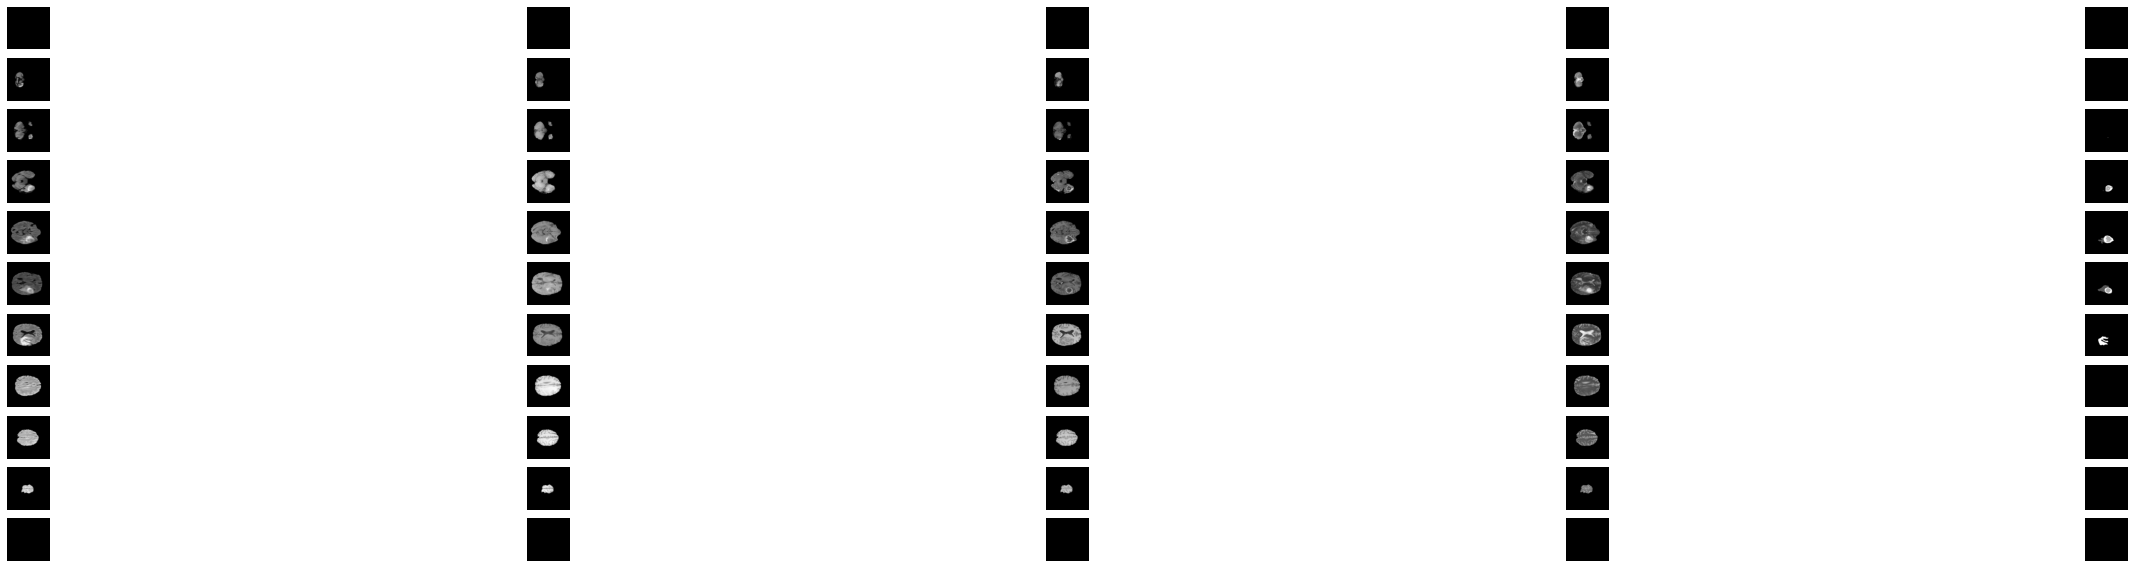

In [ ]:
#Visualizando as imagens
image_plot(step=15, dir_img='/content/drive/MyDrive/brain_tumours/features_training/BRATS_001.nii.gz', label_dir='/content/drive/MyDrive/brain_tumours/labels_training/BRATS_001.nii.gz')


In [ ]:
image_label_plot(step=15, dir_img='/content/drive/MyDrive/brain_tumours/labels_training/BRATS_001.nii.gz')

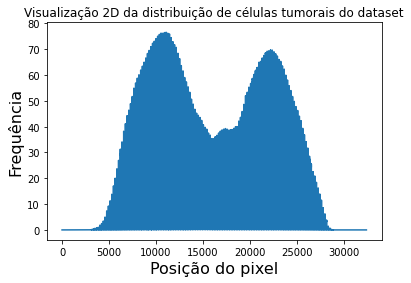

<Figure size 2880x5760 with 0 Axes>

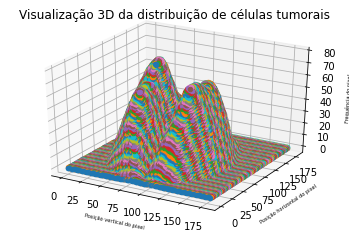

In [ ]:
#PARTE 2.1
import matplotlib.pyplot as plt
import pylab


def distribution2D(images):
    """
    :param images: vetor com o conjunto das imagens que possuem apenas o tumor (label)

    A função cria um vetor que mostra a distribuição da soma dos pixels, considerando as linhas de forma sequencial. uma matriz [[1, 2], [3, 4], [5, 6]] seria representado como [1, 2, 3, 4, 5, 6]

    """
    distribution_points = np.zeros((32400)) #32400 é a quantidade de pixels de cada imagem

    for image in images:
        for pixels in range(len(image)):
            distribution_points[pixels] += image[pixels]
    
    x = np.arange(32400)

    #plotando um gráfico com os resultados.
    plt.xlabel("Posição do pixel", size = 16)
    plt.ylabel("Frequência", size = 16)
    plt.title("Visualização 2D da distribuição de células tumorais do dataset")
    plt.plot(x, distribution_points)



def distribution3D(images):
    """
    :param images: vetor com o conjunto das imagens que possuem apenas o tumor (label)

    A função mostra de forma 3d como os pixels das imagens se distribuem. O vetor com as imagens é recebido de forma sequencial (explicado na função 2d) e no fim converte para o formato original de matriz.
    """

    pylab.figure(figsize=(40,80))
    distribution_points = np.zeros((32400))

    for image in images:
        for pixels in range(len(image)):
            distribution_points[pixels] += image[pixels]

    #plotando um gráfico com os resultados.
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_xlabel("Posição vertical do pixel", size = 5)
    ax.set_ylabel("Posição horizontal do pixel", size = 5)
    ax.set_zlabel("Frequência do pixel", size = 5)
    ax.set_title("Visualização 3D da distribuição de células tumorais")

    z = distribution_points.reshape(180, 180)

    for x in range(180):
        for y in range(180):
            ax.scatter3D(x, y, z[x][y])

if __name__ == '__main__':
    distribution2D(Y_values)
    distribution3D(Y_values)

In [ ]:
#PARTE 2.2 - VISUALIZAÇÃO DE DADOS - CRIANDO GIFS DAS IMAGENS ORIGINAIS
import imageio


def loading_original_images(name_image):
    """
    :param name_image: diretório e nome do arquivo .nii.gz
    :return: retorno do objeto numpy com os dados da imagem

    Carrega a imagem e o transforma em um numpy array
    """""

    img_nib = nib.load(name_image)
    image = np.array(img_nib.dataobj)

    return image


def separating_images(image, result=False):
    """
    :param image: objeto numpy com os valores de uma imagem
    :param result: True para as labels (3D) e False para as features (4D)

    return: vetor com cada imagem 2D que forma a imagem original
    """
    if not result:
        image = image[:, :, :, 1]

    images = []
    for i in range(155):
        images.append(image[:, :, i])

    return np.array(images)


def float_to_int8(image):
    """
    :param image: vetor com floats
    :return: vetor com inteiros
    """
    image_array = []

    for i in image:
        line = []
        for j in i:
            line.append(j)

        image_array.append(line)

    return np.array(image_array, dtype="int8")


def creating_animation(list_of_matrix, name_dir):
    with imageio.get_writer(f'{name_dir}', mode='I') as writer:
        for image2d in list_of_matrix:
            image = float_to_int8(image2d)
            writer.append_data(image)

In [ ]:
if __name__ == "__main__":
    directory = "/content/drive/MyDrive/brain_tumours/features_training/" 
    for i in range(0, 750):
        if i >= 485:
            directory = "/content/drive/MyDrive/brain_tumours/features_test/"
        a = loading_original_images(f"{directory}BRATS_{new_number(i)}.nii.gz")
        im = separating_images(a)
        creating_animation(im, f"gif_CT_{new_number(i)}.gif")

In [ ]:
#PARTE 2.3 - VISUALIZANDO A MÉDIA DAS IMAGENS
import matplotlib.pyplot as plt

def show_images(dir_brain, dir_tumor):
    feature = loading_image(dir_brain)
    label = loading_image(dir_tumor, result=True)

    plt.subplot(1, 2, 1)
    plt.imshow(feature, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap='gray')

show_images('/content/drive/MyDrive/brain_tumours/features_training/BRATS_001.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_001.nii.gz')


In [ ]:
#parte 2.4 - visualizando a distribuição de valores por imagem
def max_value_from_image(dir_img):
    """
    :param dir_img: diretório e nome do arquivo
    return: valor máximo da imagem
    """

    #return [6476.0, 9751.0, 11737.0, 5337.0] #resultado padrão se considerar todas imagens

    img_nib = nib.load(dir_img)
    image3d = img_nib.dataobj

    return np.max(image3d[:, :, :, 0]) #feature


def bins_generate(n_bins, max_value):
    """
    :param n_bins: quantidade de divisões
    :param max_value: valor máximo da separação
    :return: vetor com o valor de cada divisão


    ex: n_bins = 3 e max_value = 150
    separation = 150/3 = 50
    valor de retorno: [50, 100, 150]
    """
    
    separation = max_value/n_bins
    bins = [separation]
    for i in range(n_bins-1):
        bins.append(bins[0] + bins[-1])

    return bins


def histogram_generate(dir_feature, dir_label, n_contract, bins):
    """
    :param dir_feature: diretório e nome do arquivo que possui os dados de uma feature
    :param dir_label: diretório e nome do arquivo que possui os dados da label relacionada à feature
    :param n_contract: valor entre 0 e 3 indicando qual será o constraste utilizado (último índice das features)
    :param bins: quantidade de divisões utilizadas
    :return: dois vetores, um com os valores de cada intervalo das features e outro com os valores de cada intervalo das labels
    """

    distribution_feature = np.zeros(len(bins))
    distribution_label = np.zeros(len(bins))

    feature_nii = nib.load(dir_feature)
    img_feature = feature_nii.dataobj[:, :, :, n_contract]

    label_nii = nib.load(dir_label)
    img_label = label_nii.dataobj[:,:,:]

    for line in range(len(img_feature)):
        for col in range(len(img_feature[0])):
            for depth in range(len(img_feature[0][0])):
                if img_feature[line][col][depth] > 0:
                    for bin in range(len(bins)):
                        if img_feature[line][col][depth] <= bins[bin]:
                            distribution_feature[bin] += 1
                            if img_label[line][col][depth] != 0:
                                distribution_label[bin] += 1
                            break

    return distribution_feature, distribution_label


if __name__ == '__main__':
  max_value = max_value_from_image("/content/drive/MyDrive/brain_tumours/features_training/BRATS_001.nii.gz")
  bins = bins_generate(5, max_value)
  print(bins)
  hist = histogram_generate("/content/drive/MyDrive/brain_tumours/features_training/BRATS_001.nii.gz", "/content/drive/MyDrive/brain_tumours/labels_training/BRATS_001.nii.gz", 0, bins)
  print(hist)

  res = []

  for bin in bins:
    res.append(str(bin))

  plt.figure(figsize=(15, 8))
  plt.subplot(1, 2, 1)
  plt.title('Distribuição do conjunto completo de pixels')
  plt.bar(res, hist[0])

  plt.subplot(1, 2, 2)
  plt.title('Distribuição dos pixels que representam o tumor')
  plt.bar(res, hist[1])

In [ ]:
#PARTE 2.5 - Utilizando o nilearn para visualizar de diferentes formas as imagens
!pip install nilearn

from nilearn import image
from nilearn import plotting
from nilearn import surface
from nilearn import datasets

class brain_image:
    def __init__(self, directory):
         self.__directory = directory #diretório
         self.__image = image.index_img(directory, 0) #imagem 3d
         self.__niiobj = nib.load(directory) #imagem 4d
      
    def basic_plot(self):
        #Plot básico nos três eixos.
        plotting.plot_img(self.__image, 
                          title='BASIC PLOT')
    
    def basic_plot_anatomic(self):
        #Plot básico nos três eixos, porém em preto e branco
        plotting.plot_anat(self.__image, 
                           title='BASIC ANATOMY PLOT')
    
    def basic_plot_with_smooth(self):
        #Plot básico com a aplicação de um filtro que torna a imagem borada, porém deixa mais visível as posições dos tumores.
        smooth_img = image.smooth_img(self.__image, fwhm=15)
        plotting.plot_img(smooth_img, 
                          title='BASIC PLOT WITH SMOOTH')
    
    def stat_map_plot3D(self):
        #usado para imagens com apenas um volume
        plotting.plot_stat_map(self.__image, 
                               threshold=1, 
                               title='VOLUME VISUALIZATION')

    def glass_plot(self):
        #outra forma de plotar de forma tridimensional uma imagem, utilizando 2 eixos de cada vez
        plotting.plot_glass_brain(self.__image, threshold=5, 
                                  black_bg=True, 
                                  display_mode='xz', 
                                  title='GLASS PLOT IN X-Z')
        
        plotting.plot_glass_brain(self.__image, 
                                  threshold=25, 
                                  black_bg=True, 
                                  display_mode='yx', 
                                  title='GLASS PLOT IN X-Y')
        
        plotting.plot_glass_brain(self.__image, 
                                  threshold=10, 
                                  black_bg=True, 
                                  display_mode='yz', 
                                  title='GLASS PLOT IN Y-Z')

    def surface_visualization(self):
        #Visualização da superfície dos cérebros
        plotting.plot_img_on_surf(self.__image, 
                                  views=['lateral', 'medial'], 
                                  hemispheres=['left', 'right'], 
                                  colorbar=True, 
                                  title='PLOT OF HEMISPHERES SURFACES')

example = brain_image('/content/drive/MyDrive/brain_tumours/features_training/BRATS_001.nii.gz')

In [ ]:
#PARTE 2.6 - Utilizando o nilearn para visualizar de diferentes formas as imagens
if __name__ == '__main__':
    example.basic_plot()
    example.basic_plot_anatomic()
    example.basic_plot_with_smooth()
    example.stat_map_plot3D()
    example.glass_plot()
    example.surface_visualization()

In [ ]:
# PARTE 3.1: UTILIZANDO OS DADOS LIDOS PARA CRIAÇÃO DA ÁRVORE DE REGRESSÃO COM SCIKITLEARN.
from sklearn.tree import DecisionTreeRegressor

if __name__ == '__main__':
    # Separando os dados para serem usados nos testes e treinos.
    # X_train, X_values, y_train, y_values = train_test_split(X_values, Y_values, test_size=0.3, random_state=0)

    # PARÂMETROS DA ÁRVORE:
    # max_depth -> Profundidade da árvore.
    # min_samples_leaf -> valores mínimos para cada previsão.
    # min_samples_split -> quantos exemplos é necessário em um nó para poder ir para o próximo
    # min_weight_fraction_leaf -> peso mínimo para geração de um nó
    # max_leaf_nodes -> máximo de nós finais
    # min_impurity_decrease -> redução mínimo de erro para gerar novo nó

    tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=7)  # tentativa de descobrir os melhores parâmetros para a árvore (acho que até amanhã eu descubro e mudo essa parte)
    # Para o treino, as 10 primeiras imagens ficaram de fora para serem testadas.
    tree.fit(X_values[10::], Y_values[10::])  #############################################

    prediction = tree.predict([X_values[0], X_values[1],
                               X_values[2], X_values[3],
                               X_values[4], X_values[5],
                               X_values[6], X_values[7],
                               X_values[8], X_values[9]])
  

In [ ]:
#Salvando o modelo
import pickle

pickle.dump(tree, open('/content/drive/MyDrive/tree_for_complete_images.pkl', 'wb'))

In [ ]:
#Lendo e utilizando o modelo
trained_tree = pickle.load(open('/content/drive/MyDrive/tree_for_complete_images.pkl', 'rb'))

results = []

for img in X_values[0:10]:
  results.append(trained_tree.predict([img]))

In [ ]:
#visualizando os resultados
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))

number_of_cols = 2
images_per_line = 2*len(results)//number_of_cols

count = 1
for idx, result in enumerate(results):
  plt.subplot(images_per_line, number_of_cols, count)
  plt.imshow(np.array(result.reshape(180, 180)), cmap='gray')

  plt.subplot(images_per_line, number_of_cols, count+1)
  plt.imshow(Y_values[idx].reshape(180, 180), cmap='gray')

  count += 2
  

In [ ]:
#PARTE 3: UTILIZANDO OS DADOS PARA CRIAÇÃO DE UMA RANDOM FOREST DE REGRESSÃO

from sklearn.ensemble import RandomForestRegressor

if __name__ == '__main__':
    random_forest = RandomForestRegressor(n_estimators=35,
                                          random_state=0,
                                          n_jobs=-1,
                                          oob_score=True,
                                          max_depth=8,
                                          min_samples_leaf=7)

    random_forest.fit(X_values[10::], Y_values[10::])  # tentativa de descobrir os melhores parâmetros para a árvore (acho que até amanhã eu descubro e mudo essa parte)

    # Para o treino, as 10 primeiras imagens ficaram de fora para serem testadas.
    prediction = random_forest.predict([X_values[0], X_values[1],
                                        X_values[2], X_values[3],
                                        X_values[4], X_values[5],
                                        X_values[6], X_values[7],
                                        X_values[8], X_values[9]])


In [ ]:
#Salvando o modelo
import pickle

pickle.dump(tree, open('/content/drive/MyDrive/tree_for_complete_images.pkl', 'wb'))

In [ ]:
#Lendo e utilizando o modelo
trained_tree = pickle.load(open('/content/drive/MyDrive/tree_for_complete_images.pkl', 'rb'))

results = []

for img in X_values[0:10]:
  results.append(trained_tree.predict([img]))

In [ ]:
#visualizando os resultados
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))

number_of_cols = 2
images_per_line = 2*len(results)//number_of_cols

count = 1
for idx, result in enumerate(results):
  plt.subplot(images_per_line, number_of_cols, count)
  plt.imshow(np.array(result.reshape(180, 180)), cmap='gray')

  plt.subplot(images_per_line, number_of_cols, count+1)
  plt.imshow(Y_values[idx].reshape(180, 180), cmap='gray')

  count += 2

In [ ]:
#PARTE 6.1 - ANALISANDO AS LABELS PARA DESCOBRIR EM QUAL QUADRANTE O TUMOR PREDOMINA EM CADA IMAGEM.

def quadrant_check(n_images):
  #Passa por cada uma das imagens e verifica a quantidade de pixels diferentes de zero está em cada um dos quadrantes.
  results = []

  for i in range(n_images):
    res = nib.load('/content/drive/MyDrive/brain_tumours/labels_training/BRATS_' + new_number(i) + '.nii.gz')
    res = np.array(res.dataobj)
    results.append(results_mean(res))

  results = np.array(results)

  values = []
  for result in results:
    q1 = 0
    q2 = 0
    q3 = 0
    q4 = 0
    
    for lines in range(len(result)):
      for columns in range(len(result[0])):
        if result[lines][columns] > 0:
          if lines >= 120:
            if columns < 120:
              q3 += 1
            else:
              q4 += 1
          else:
            if columns > 120:
              q1 += 1
            else:
              q2 += 1

    values.append([q1, q2, q3, q4])

  return np.array(values)

def save_quadrants(values_list):
    #Salva em um arquivo de texto o número da imagem e em qual quadrante o tumor predomina nessa imagem

    a = open('drive/MyDrive/quadrants_tumor_position.txt', 'w')
    for i in range(len(values_list)):
      index = 0
      big = 0
      for j in range(len(values_list[0])):
        if values_list[i][j] > big:
          big = values_list[i][j]
          index = j

      a.write(f'{i+1}, {index+1}\n')

    a.close()
    

In [ ]:
if __name__ == '__main__':
  quadrants_list = quadrant_check(484)
  save_quadrants(quadrants_list)


In [ ]:
# PARTE 6.2 - CRIANDO UMA ÁRVORE DE CLASSIFICAÇÃO PARA TENTAR PREVER EM QUAIS QUADRANTES DA IMAGEM OS TUMORES PREDOMINAM. //REVER
from sklearn.tree import DecisionTreeClassifier

def get_quadrants(quadrants):
  """
  lê o arquivo que possui os quadrantes dominantes
  """
  values = []

  a = open(quadrants)
  v = a.readlines()

  for i in range(len(v)):
    values.append(int(v[i][-2][0]))

  a.close()

  return values


In [ ]:
if __name__ == '__main__':
  quadrants = get_quadrants('drive/MyDrive/quadrants_tumor_position.txt')

  images = []
  AMOUNT = 484
  for i in range(AMOUNT):
          number = new_number(i)
          directory = '/content/drive/MyDrive/imagens_treino/media_imagens/treinos2D/img_' + number # Local aonde foi salvo os arquivos gerados por cada imagem de treino
          v = reading_dataset(directory)

          images.append(v)

  
  quadrants = np.array(quadrants[10:])
  images_test = np.array(images[:10])
  images = np.array(images[10:])

  tree = DecisionTreeClassifier(max_depth = 3)
  tree.fit(images, quadrants)
  p = tree.predict(images_test)
  print(p)
  print(np.array([3, 2, 3, 2, 3, 1, 3, 3, 4, 2, 1, 1, 3, 1, 1]))
  

In [ ]:
#PARTE 7.1 - CLUSTERIZANDO O DATASET E PREVENDO NOVOS CLUSTERS A PARTIR DE ÁRVORES DE CLASSIFICAÇÃO:
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab
import pickle

def reading_dataobj_reshaped(init, end):
    #Lê os objetos e transforma os tensores em vetores. Os dados são tranformados de float de 64 bits para int de 8 bits por necessidade de memória extra
    objects = []

    for i in range(init, end):
        directory = "/content/drive/MyDrive/brain_tumours/features_training/BRATS_" + new_number(i) + ".nii.gz"
        nii_file = nib.load(directory).dataobj[:, :, :, 0].reshape(8928000) #240*240*155

        objects.append(nii_file)
    
    return np.array(objects, dtype="int8")

def accuracy_tree(tree_results, real_results):
    accuracy = 0
    for r in range(len(tree_results)):
        if tree_results[r] == real_results[r]:
            accuracy += 1

    return 100*accuracy/len(tree_results) #percent of correct results


In [ ]:
#7.2 - Clusterizando as médias das imagens com kmeans e separando os valores de treino e teste para as árvores
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

kmeans_obj = KMeans(n_clusters=3)
kmeans_obj.fit(X_values)
y = kmeans_obj.predict(X_values)

X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size = 0.3, random_state = 0)

In [ ]:
#7.3 - criando e treinando uma árvore de classificação para futuras imagens

if __name__ == '__main__':
    decision_tree = tree.DecisionTreeClassifier(criterion='gini', 
                                                max_depth=8, 
                                                random_state=0, 
                                                min_samples_leaf=2)
    
    decision_tree = decision_tree.fit(X_train, y_train)
    prediction1 = decision_tree.predict(X_test)

    print(accuracy_tree(prediction1, y_test))

    pylab.figure(figsize=(25,35))
    tree.plot_tree(decision_tree)

In [ ]:
#7.4 - criando e treinando uma random forest de classificação para futuras imagens
if __name__ == '__main__':
    random_tree = RandomForestClassifier(n_estimators=10, 
                                         max_depth=8, 
                                         min_samples_leaf=3, 
                                         random_state=0, 
                                         n_jobs=-1)
    
    random_tree.fit(X_values, y)
    prediction2 = random_tree.predict(X_test)

    print(accuracy_tree(prediction2, y_test))

In [ ]:
for i in range(len(y_test)):
    print("Teste ", end='')
    print(i+1, end=':\n')
    print("K-MEANS: ", end='')
    print(y_test[i])
    print("Classifier Tree: ", end='')
    print(prediction1[i])
    print("Random Forest: ", end='')
    print(prediction2[i])
    print('=========================', end='\n')

In [ ]:
#LENDO OS DADOS E CLUSTERIZANDO AS IMAGENS COMPLETAS
if __name__ == '__main__':    
    reshaped_X_values = reading_dataobj_reshaped(0, 60)

    kmeans_obj = KMeans(n_clusters=4, random_state=0)
    kmeans_obj.fit(reshaped_X_values)
    y = kmeans_obj.predict(reshaped_X_values)

    X_train, X_test, y_train, y_test = train_test_split(reshaped_X_values, y, test_size = 0.3, random_state = 0)


In [ ]:
#treinando e testando uma árvore de classificação para futuras imagens

if __name__ == '__main__':
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', 
                                                max_depth=5, 
                                                random_state=0, 
                                                min_samples_leaf=1)
    
    decision_tree = decision_tree.fit(X_train, y_train)
    prediction = decision_tree.predict(X_test)

    print(accuracy_tree(prediction, y_test))

    pylab.figure(figsize=(25,35))
    tree.plot_tree(decision_tree)

In [ ]:
#7.4 - criando e treinando uma random forest de classificação para futuras imagens

if __name__ == '__main__':
    random_tree = RandomForestClassifier(n_estimators=11, 
                                         max_depth=11, 
                                         min_samples_leaf=2, 
                                         random_state=0, 
                                         n_jobs=-1)
    
    random_tree.fit(reshaped_X_values, y)
    prediction = random_tree.predict(X_test)

    print(accuracy_tree(prediction, y_test))


In [ ]:
#8 - UTILIZANDO OS MODELOS SALVOS E COMPARANDO O RESULTADO DAS ÁRVORES COM OS CLUSTERS
if __name__ == '__main__':
    results = []

    for i in range(66, 484):
        directory = "/content/drive/MyDrive/brain_tumours/features_training/BRATS_" + new_number(i) + ".nii.gz"
        nii_file = nib.load(directory).dataobj[:, :, :, 0].reshape(8928000)
        test = np.array(nii_file, dtype="int8")

        results.append(
            ( kmeans_obj.predict([test]), decision_tree.predict([test]), random_tree.predict([test]) )
            )

    for result in results:
        print("KMEANS:", result[0])
        print("CLASSIFIER TREE:", result[1])
        print("RANDOM FOREST CLASSIFIER:", result[2])
        print("============================")

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def blocks_from_images(dim, init, end):
    blocks = []
    results = []

    for digit in range(init, end):
        feature_dir = '/content/drive/MyDrive/brain_tumours/features_training/BRATS_' + new_number(digit) + '.nii.gz'
        label_dir = '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_' + new_number(digit) + '.nii.gz'
        img_feature = nib.load(feature_dir).dataobj[:, :, :, 0]
        img_label = nib.load(label_dir).dataobj[:,:,:]

        for i in range(35,205):
            for j in range(35, 205):
                for k in range(38, 122):
                    block = np.array([np.array(img_feature[i:i+dim, j:j+dim, k:k+dim]/255, dtype=np.uint8)]).reshape(dim**3)
                    if 0 not in block:
                        blocks.append(block)
                        if 0 in (np.array([img_label[i:i+dim, j:j+dim, k:k+dim]/255]).reshape(dim**3)):
                            results.append(False)
                        else:
                            results.append(True)

    return np.array(blocks, dtype=np.uint8), np.array(results)


def accuracy_tree(tree_results, real_results):
    accuracy = 0
    for r in range(len(tree_results)):
        if tree_results[r] == real_results[r]:
            accuracy += 1

    return 100*accuracy/len(tree_results) #percent of correct results

def comparison_plot_for_regression_tree(tree_model, dir_img, dir_label, dim=2):
    img = nib.load(dir_img).dataobj
    img = img[:,:,:,0]
    label = np.array(nib.load(dir_label).dataobj)
    
    empty_img = np.zeros((240, 240, 155))

    for i in range(35,205):
            for j in range(35, 205):
                for k in range(20, 135):
                    block = np.array([np.array(img[i:i+dim, j:j+dim, k:k+dim]/255, dtype=np.uint8)]).reshape(dim**3)
                    if 0 not in block:
                        empty_img[i][j][k] = tree_model.predict([block])
                        

    plt.figure(figsize=(20, 45))

    count = 1  
    for x in range(0, img.shape[2], 5):

      plt.subplot(len(img)//5, 3, count)
      plt.axis('off')
      plt.imshow(img[:,:,x], cmap='gray')

      plt.subplot(len(img)//5, 3, count+1)
      plt.axis('off')
      plt.imshow(label[:,:,x], cmap='gray')

      plt.subplot(len(img)//5, 3, count+2)
      plt.axis('off')
      plt.imshow(empty_img[:,:,x], cmap='gray')

      count += 3
    
    plt.show()





    

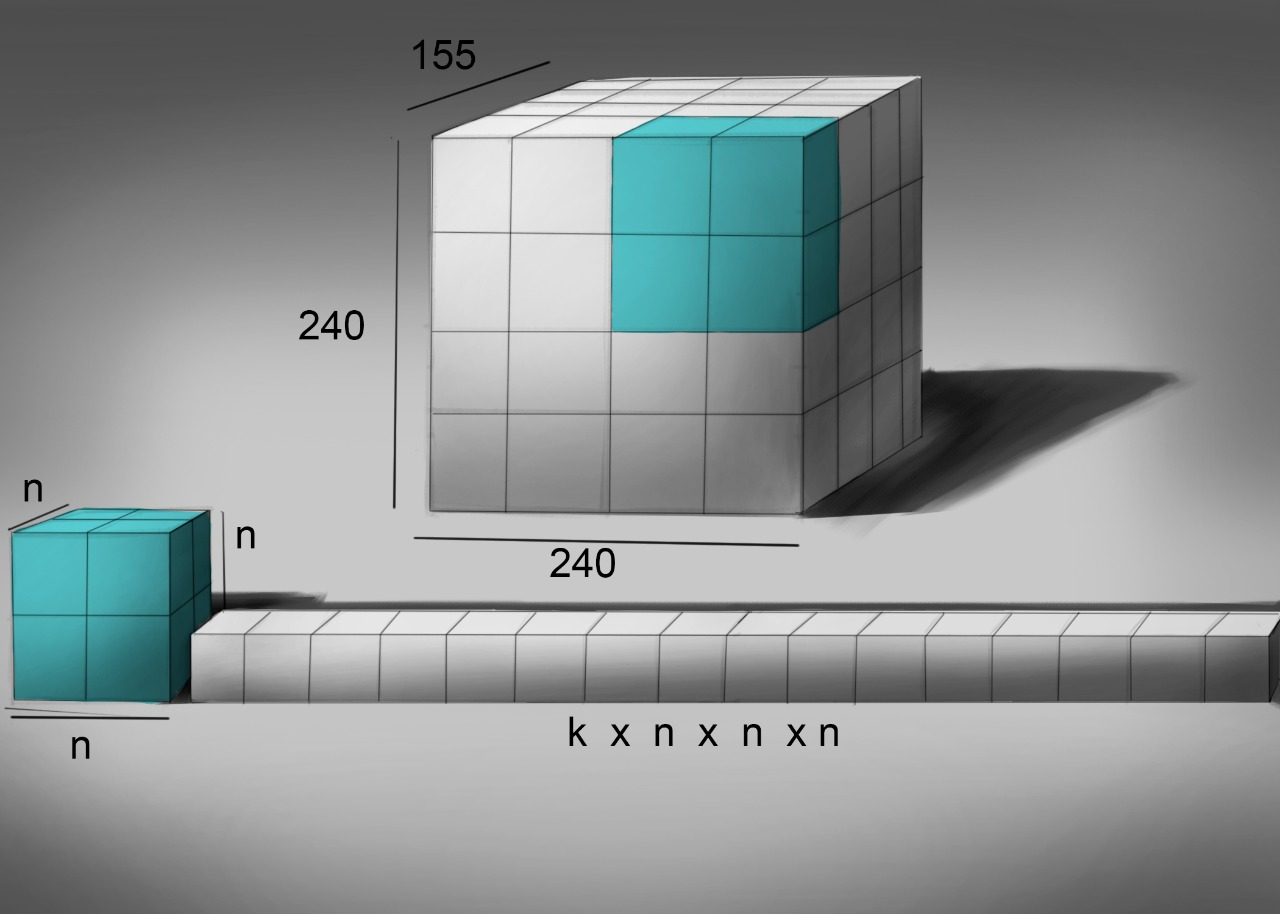

In [ ]:
x, y = blocks_from_images(3, 0, 2)

In [ ]:
comparison_plot_for_regression_tree(clf, 3, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model0 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)
model0.fit(x, y)

results = []
for i in range(10):
  x, y = blocks_from_images(2, i+150, i+151)
  results.append(accuracy_tree(model0.predict(x), y))
print(results)

In [ ]:
comparison_plot_for_regression_tree(model0, 2, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
model.fit(x, y)

results = []
for i in range(10):
  x, y = blocks_from_images(2, i+150, i+151)
  results.append(accuracy_tree(model.predict(x), y))
print(results)

In [ ]:
comparison_plot_for_regression_tree(model, 2, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_160.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_160.nii.gz')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)
model2.fit(x, y)

results = []
for i in range(10):
  x, y = blocks_from_images(2, i+150, i+151)
  results.append(accuracy_tree(model2.predict(x), y))
print(results)

In [ ]:
comparison_plot_for_regression_tree(model2, 2, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_160.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_160.nii.gz')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=15, min_samples_leaf=10)
model3.fit(x, y)

results = []
for i in range(10):
  x, y = blocks_from_images(2, i+150, i+151)
  results.append(accuracy_tree(model2.predict(x), y))
print(results)

In [ ]:
comparison_plot_for_regression_tree(model3, 2, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_160.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_160.nii.gz')

In [ ]:
#CLUSTERIZANDO OS DADOS ANTES DE COLOCAR EM ÁRVORES
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

def reading_dataobj_reshaped(init, end):
    #Lê os objetos e transforma os tensores em vetores. Os dados são tranformados de float de 64 bits para int de 8 bits por necessidade de memória extra
    objects = []

    for i in range(init, end):
        directory = "/content/drive/MyDrive/brain_tumours/features_training/BRATS_" + new_number(i) + ".nii.gz"
        nii_file = (nib.load(directory).dataobj[:, :, :, 0]).reshape(8928000) #240*240*155

        objects.append(nii_file)
    
    return np.array(objects, dtype=np.uint8)

def blocks_from_images_with_clusters(dim, init, end):
    X_values = reading_dataobj_reshaped(init, end)

    kmeans_obj = KMeans(
                 n_clusters=3,
                 random_state=0) 
    
    kmeans_obj.fit(X_values)
    X_values = []
    del X_values

    x = [[] for _ in range(kmeans_obj.n_clusters)]
    y = [[] for _ in range(kmeans_obj.n_clusters)]

    for digit in range(end-init):
        feature_dir = '/content/drive/MyDrive/brain_tumours/features_training/BRATS_' + new_number(digit) + '.nii.gz'
        label_dir = '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_' + new_number(digit) + '.nii.gz'
        img_feature = nib.load(feature_dir).dataobj[:, :, :, 0]
        img_label = nib.load(label_dir).dataobj[:,:,:]
        idx = kmeans_obj.predict([np.array(img_feature.reshape(8928000), dtype=np.uint8)])[0]

        for i in range(35,205):
            for j in range(35, 205):
                for k in range(25, 130):
                    block = np.array([np.array(img_feature[i:i+dim, j:j+dim, k:k+dim]/255, dtype=np.uint8)]).reshape(8)
                    if 0 not in block:
                        x[idx].append(block)
                        if 0 in (np.array([img_label[i:i+dim, j:j+dim, k:k+dim]/255]).reshape(8)):
                            y[idx].append(False)
                        else:
                            y[idx].append(True)

    return np.array(x), np.array(y), kmeans_obj

def trees_images_with_clusters(x, y, random_forest=False): #x e y são os conjuntos de dados para todos os clusters
    trees = []
    for i in range(len(x)):
        if random_forest:
            random_tree = RandomForestClassifier(n_estimators=11, 
                                                 max_depth=8, 
                                                 min_samples_leaf=2, 
                                                 random_state=0, 
                                                 n_jobs=-1)
            random_tree.fit(x[i], y[i])
            trees.append(random_tree)
        else:
            decision_tree = tree.DecisionTreeClassifier(criterion='gini', 
                                                        max_depth=8, 
                                                        random_state=0, 
                                                        min_samples_leaf=2)
            decision_tree = decision_tree.fit(x[i], y[i])
            trees.append(decision_tree)

    return trees

def predict_blocks(dim, trees, kmeans_obj, init, end):
    predicts = []
    for i in range(init, end):
        x, y = blocks_from_images(dim, i, i+1)
        idx = kmeans_obj.predict([nib.load('/content/drive/MyDrive/brain_tumours/features_training/BRATS_' + new_number(i) + '.nii.gz').dataobj[:, :, :, 0].reshape(8928000)])[0]
        predicts.append(trees[idx].predict(x))
  
    return predicts

def accuracy_tree(tree_results, real_results): #FUNÇÃO REPETIDA 
    accuracy = 0
    for r in range(len(tree_results)):
        if tree_results[r] == real_results[r]:
            accuracy += 1

    return 100*accuracy/len(tree_results) #percent of correct results

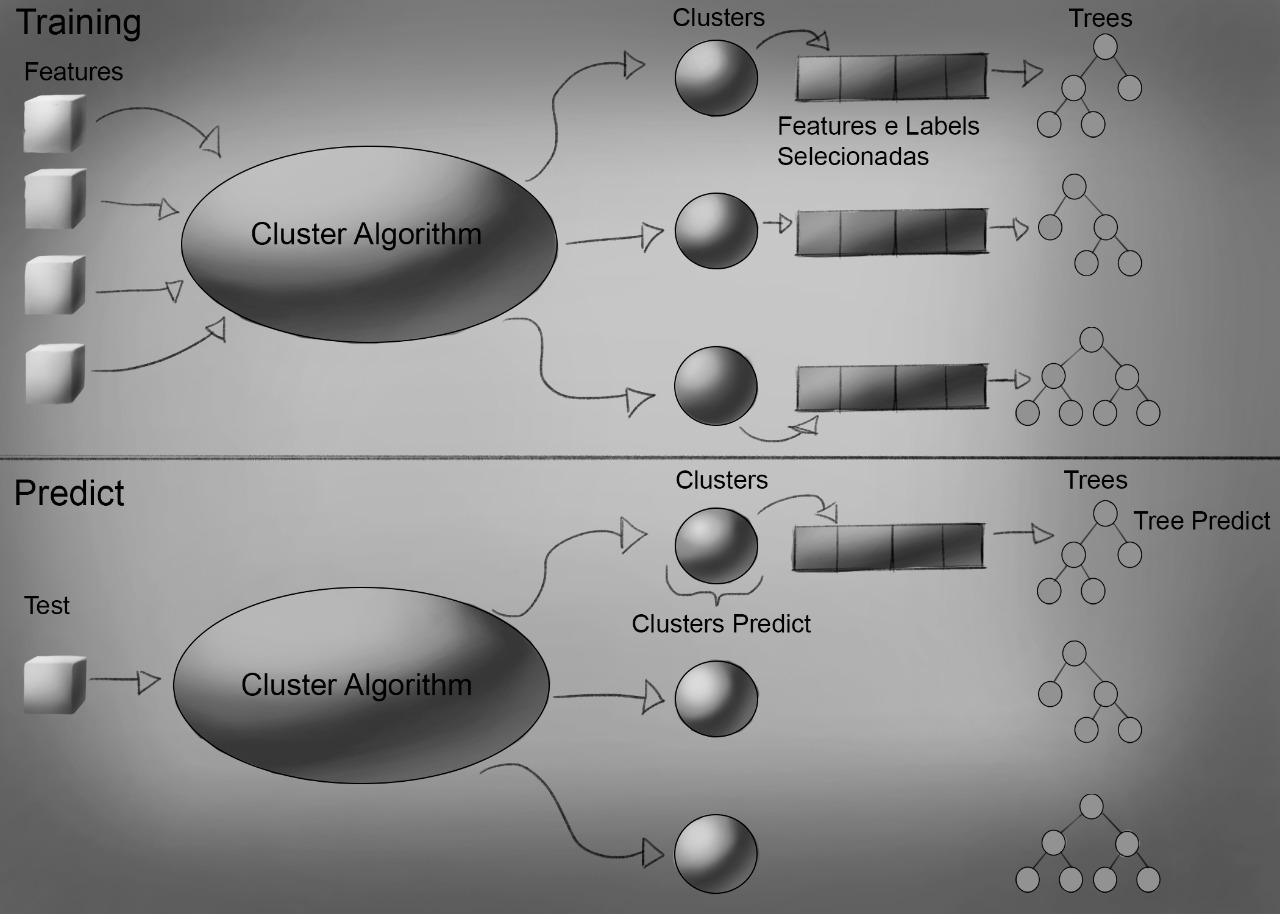

In [ ]:
x, y, kmeans = blocks_from_images_with_clusters(2, 0, 45)

In [ ]:
trees = trees_images_with_clusters(x, y)

In [ ]:
pred = predict_blocks(2, trees, kmeans, 101, 110)

In [ ]:
x1, y1 = blocks_from_images(2, 101, 102)
x2, y2 = blocks_from_images(2, 102, 103)
x3, y3 = blocks_from_images(2, 103, 104)
x4, y4 = blocks_from_images(2, 104, 105)
x5, y5 = blocks_from_images(2, 105, 106)
x6, y6 = blocks_from_images(2, 106, 107)
x7, y7 = blocks_from_images(2, 107, 108)
x8, y8 = blocks_from_images(2, 108, 109)
x9, y9 = blocks_from_images(2, 109, 110)
print(accuracy_tree(pred[0], y1))
print(accuracy_tree(pred[1], y2))
print(accuracy_tree(pred[2], y3))
print(accuracy_tree(pred[3], y4))
print(accuracy_tree(pred[4], y5))
print(accuracy_tree(pred[5], y6))
print(accuracy_tree(pred[6], y7))
print(accuracy_tree(pred[7], y8))
print(accuracy_tree(pred[8], y9))

In [ ]:
img = np.array(nib.load('/content/drive/MyDrive/brain_tumours/features_training/BRATS_103.nii.gz').dataobj)[:,:,:,0].reshape(240*240*155)
n_cluster = kmeans.predict([img])[0]
comparison_plot_for_regression_tree(trees[n_cluster], '/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz')

In [ ]:
x, y, kmeans = blocks_from_images_with_clusters(2, 0, 45)

In [ ]:
trees = trees_images_with_clusters(x, y, random_forest=True)

In [ ]:
pred = predict_blocks(2, trees, kmeans, 101, 110)

In [ ]:
x1, y1 = blocks_from_images(2, 101, 102)
x2, y2 = blocks_from_images(2, 102, 103)
x3, y3 = blocks_from_images(2, 103, 104)
x4, y4 = blocks_from_images(2, 104, 105)
x5, y5 = blocks_from_images(2, 105, 106)
x6, y6 = blocks_from_images(2, 106, 107)
x7, y7 = blocks_from_images(2, 107, 108)
x8, y8 = blocks_from_images(2, 108, 109)
x9, y9 = blocks_from_images(2, 109, 110)
print(accuracy_tree(pred[0], y1))
print(accuracy_tree(pred[1], y2))
print(accuracy_tree(pred[2], y3))
print(accuracy_tree(pred[3], y4))
print(accuracy_tree(pred[4], y5))
print(accuracy_tree(pred[5], y6))
print(accuracy_tree(pred[6], y7))
print(accuracy_tree(pred[7], y8))
print(accuracy_tree(pred[8], y9))

In [ ]:
img = np.array(nib.load('/content/drive/MyDrive/brain_tumours/features_training/BRATS_103.nii.gz').dataobj)[:,:,:,0].reshape(240*240*155)
n_cluster = kmeans.predict([img])[0]

comparison_plot_for_regression_tree(trees[n_cluster], '/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz')

In [ ]:
def segmentation_with_clusters(absolute_path, kmeans_obj, trees_list, dim):
    test_img = nib.load(absolute_path).dataobj[:, :, :, 0]
    img = np.zeros(test_img.shape)

    idx = kmeans_obj.predict([test_img.reshape(240*240*155)])[0]
    tree = trees_list[idx]

    for i in range(35, 205):
      for j in range(35, 205):
        for k in range(35, 130):
            if tree.predict([np.array(test_img[i:i+dim,j:j+dim,k:k+dim]/255).reshape(8)]):
                img[i][j][k] = test_img[i][j][k]
    
    return img


In [ ]:
a = segmentation_with_clusters('/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', kmeans, trees, 2)

In [ ]:
b = nib.load('/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz').get_fdata()

In [ ]:
import numpy as np
import nibabel as nib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

def absolute_error(img_res, img_label):
    return sum(abs(img_label[i][j][k] - img_res[i][j][k]) for i in range(240) for j in range(240) for k in range(155))


def segmentation(absolute_path, tree, dim):
    test_img = nib.load(absolute_path).dataobj[:, :, :, 0]
    img = np.zeros(test_img.shape)

    for i in range(20, 220):
        percent = (i-20+1)/(220-20)*100
        #print(f'{percent:.2f}', end='%\n')
        for j in range(20, 220):
            for k in range(15, 140):
                img[i+1][j+1][k+1] = tree.predict([(np.array(test_img[i:i+dim, j:j+dim, k:k+dim]/255)).reshape(dim**3)])*255/1150
    return img


def predict_with_tree(object_path, image_path, dim_blocks):
    file = open(object_path, 'rb')
    tree_model = pickle.load(file)
    file.close()

    return segmentation(image_path, tree_model, dim_blocks)


def plot_images(img, plot_dim):
    plt.figure(figsize=(plot_dim, plot_dim))
    i = 0
    for x in img[::5]:
        plt.subplot(plot_dim, plot_dim, 1 + i)
        plt.imshow(x, cmap='gray')
        i += 1
        if i == plot_dim * plot_dim:
            break

    plt.savefig(fname='teste', format='png')
    plt.show()


def test_model(model_path):
    errors = []
    for i in range(10):
        print(f"{i+1}/10")
        feature_path = 'C:\\Users\\gabri\\PycharmProjects\\projeto_arvores\\TCs_features_training\\BRATS_0' + str(60+i) + '.nii.gz'
        label_path = 'C:\\Users\\gabri\\PycharmProjects\\projeto_arvores\\TCs_labels_training\\BRATS_0' + str(60+i) + '.nii.gz'

        img_res = predict_with_tree(model_path, feature_path, 3)

        img_label = nib.load(label_path).dataobj[:, :, :]
        errors.append(absolute_error(img_res, img_label))

    return errors


def blocks_from_images(dim, init, end):
    blocks = []
    results = []

    for digit in range(init, end):
        print(f'current image: {digit-init+1} of {end-init}')
        feature_dir = 'C:\\Users\\gabri\\PycharmProjects\\projeto_arvores\\TCs_features_training\\BRATS_' + new_number(digit) + '.nii.gz'
        label_dir = 'C:\\Users\\gabri\\PycharmProjects\\projeto_arvores\\TCs_labels_training\\BRATS_' + new_number(digit) + '.nii.gz'
        img_feature = nib.load(feature_dir).dataobj[:, :, :, 0]
        img_label = nib.load(label_dir).dataobj[:, :, :]

        for i in range(35, 205):
            for j in range(35, 205):
                for k in range(20, 135):
                    block = np.array(img_feature[i:i+dim, j:j+dim, k:k+dim]//255, dtype=np.int8).reshape(dim**3)
                    if 0 not in block:
                        blocks.append(block)
                        results.append(img_label[i+1][j+1][k+1]*1150/255)

    return np.array(blocks, dtype=np.int8), np.array(results, dtype=np.float16)


In [ ]:
if __name__ == '__main__':
    # reading data
    features, labels = blocks_from_images(3, 0, 50)

    #matriz com os valores de altura máxima e 
    #quantidade mínima de dados para criação de novo nó na árvore
    params_list = [[3, 2], [3, 3], [3, 5], [3,7], [3, 9], 
                   [5, 2], [5, 3], [5, 5], [5, 7], [5, 9],
                   [5, 2], [5, 3], [5, 5], [5, 7], [5, 9],
                   [7, 2], [7 ,3], [7, 5], [7, 7], [7, 9],
                   [9, 2], [9, 3], [9, 5], [9, 7], [9, 9],
                   [10, 2], [10, 3], [10, 5], [10, 7], [10, 9],
                   [13, 2], [13, 3], [13, 5], [13, 7], [13, 9],
                   [15, 2], [15, 3], [15, 5], [15, 7], [15, 9],
                   [17, 2], [17, 3], [17, 5], [17, 7], [17, 9]]

    # making files of decision tree
    count = 1
    for params in params_list:
        print(f"decision_tree number {count}")
        count += 1
        decision_tree_regressor = DecisionTreeRegressor(criterion='squared_error',
                                                        max_depth=params[0],
                                                        min_samples_leaf=params[1],
                                                        random_state=0)
        decision_tree_regressor.fit(features, labels)

        with open(f'C:\\Users\\gabri\\Desktop\\models\\decision_tree_regressor_{params[0]}_{params[1]}', 'wb') as file:
            pickle.dump(decision_tree_regressor, file)

SyntaxError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('/content/drive/MyDrive/projeto_arvores/models/models_results.txt')
results

,max_depth,min_samples_leaf,abs_error_1,abs_error_2,abs_error_3,abs_error_4,abs_error_5,abs_error_6,abs_error_7,abs_error_8,abs_error_9,abs_error_10
0,3,2,320746.422708,262266.071673,468042.243776,297555.804309,472843.842867,385407.469376,324981.769802,417842.250965,526356.632026,467500.537776
1,3,3,320746.422708,262266.071673,468042.243776,297555.804309,472843.842867,385407.469376,324981.769802,417842.250965,526356.632026,467500.537776
2,3,7,320746.422708,262266.071673,468042.243776,297555.804309,472843.842867,385407.469376,324981.769802,417842.250965,526356.632026,467500.537776
3,5,2,283384.813270,226279.869782,460007.029951,263064.149124,439466.352901,352882.853448,292998.622944,393897.620997,527128.381904,460715.556461
4,3,5,320746.422708,262266.071673,468042.243776,297555.804309,472843.842867,385407.469376,324981.769802,417842.250965,526356.632026,467500.537776
5,5,3,283384.813270,226279.869782,460007.029951,263064.149124,439466.352901,352882.853448,292998.622944,393897.620997,527128.381904,460715.556461
6,5,5,283384.813270,226279.869782,460007.029951,263064.149124,439466.352901,352882.853448,292998.622944,393897.620997,527128.381904,460715.556461
7,5,7,283384.813270,226279.869782,460007.029951,263064.149124,439466.352901,352882.853448,292998.622944,393897.620997,527128.381904,460715.556461
8,5,9,283384.813270,226279.869782,460007.029951,263064.149124,439466.352901,352882.853448,292998.622944,393897.620997,527128.381904,460715.556461
9,7,2,215288.882155,160737.912119,405734.200788,200172.584503,375000.088512,279051.921589,230378.528432,330199.104670,476698.271253,404863.993756


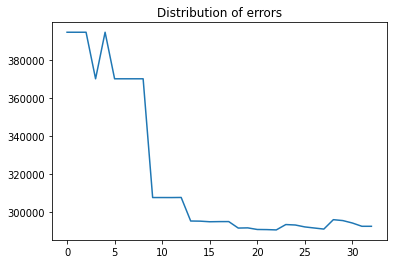

In [ ]:
r = results.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].mean(axis=1)
plt.title('Distribution of errors')
plt.plot(r)

In [ ]:
r.nsmallest(5)

#22 -> max_depth:13	min_samples_leaf:9
#21 -> max_depth:13	min_samples_leaf:7
#20 -> max_depth:13	min_samples_leaf:5
#27 -> max_depth:15	min_samples_leaf:9
#18 -> max_depth:13	min_samples_leaf:2

22    290862.884218
21    291029.414168
20    291091.973915
27    291303.129809
18    291835.646695
dtype: float64

In [ ]:
#Lendo o melhor modelo:
import pickle

with open('/content/drive/MyDrive/projeto_arvores/models/decision_tree_regressor_13_9', 'rb') as f:
    tree = pickle.load(f)

print(type(tree))
print(tree.get_params)

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=13, min_samples_leaf=9, random_state=0)>


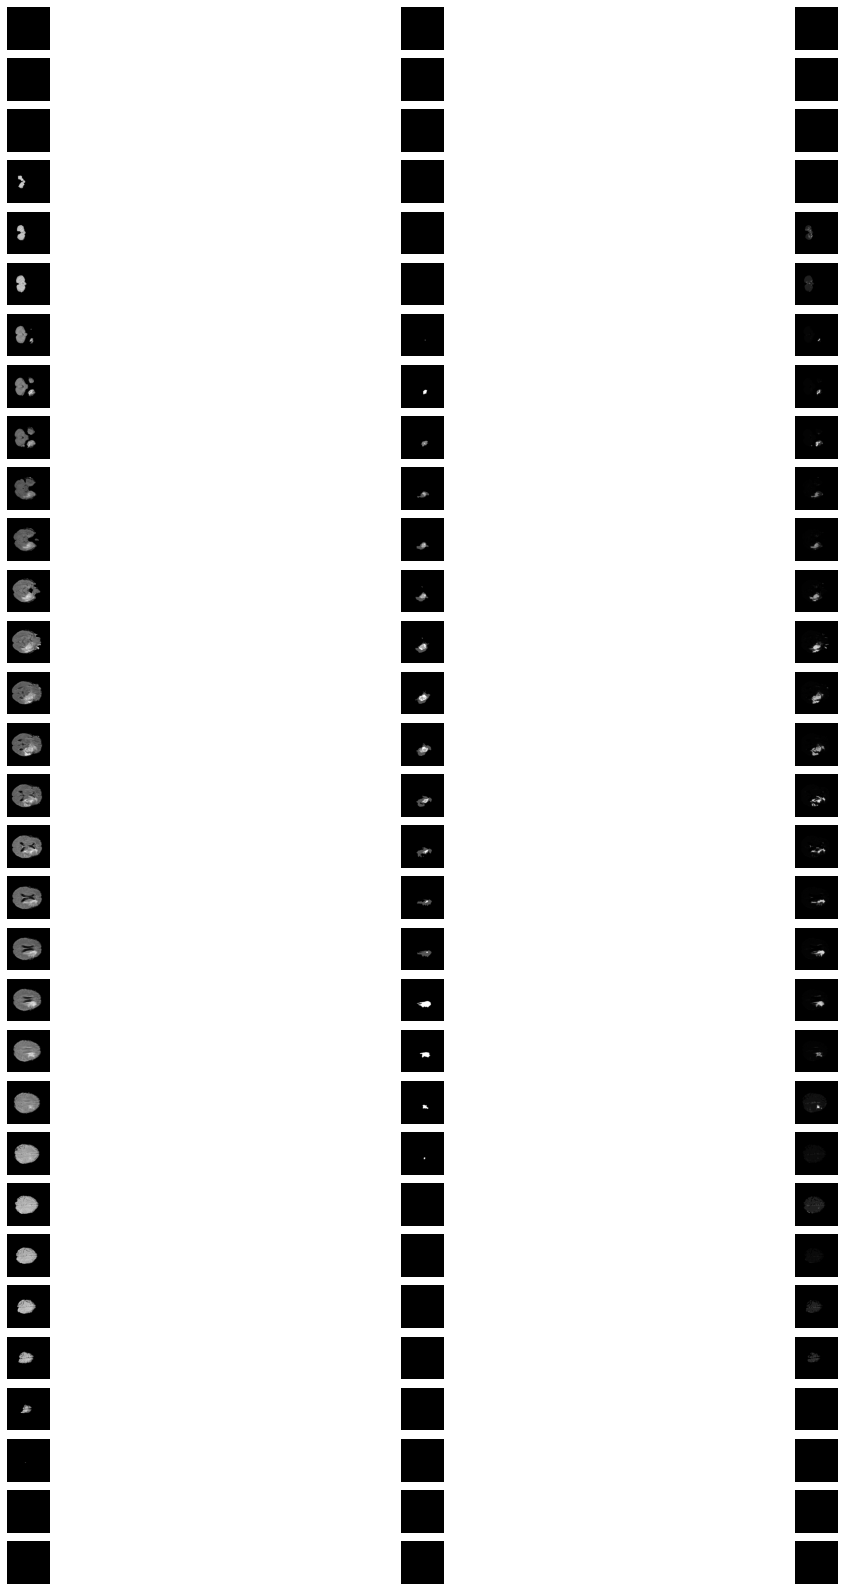

In [ ]:
comparison_plot_for_regression_tree(tree, '/content/drive/MyDrive/brain_tumours/features_training/BRATS_203.nii.gz', '/content/drive/MyDrive/brain_tumours/labels_training/BRATS_203.nii.gz', 3)